# K-Means Clustering with Python

## Objectives
After this workshop, you will be able to:
* describe the k-means clustering algorithm
* understand the limits of k-means clustering
* edit and execute cells in a Jupyter notebook
* use a pandas DataFrame object
* find which Olympic event you're best suited for!

## What is the *k-means* clustering algorithm?

K-means is a clustering algorithm to divide groups of data into *k* number of clusters. It is unsupervised learning, so the clustering happens on unlabeled, unclassified data without any guidance.

The steps are:
1. Initialize *k* cluster centers ("centroids") within the parameters of the data
2. Assign each datapoint to its closest centroid, usually by Euclidean distance.
3. Update the location of each cluster's centroid.
4. Repeat steps 2 & 3 until the clusters don't change.

![K-Means Clustering](static/kmeans.gif)


## When should I use k-means?

K-means clustering works well on data sets with points that are distinct or well-separated from each other in a linear fashion. For picking the number of centroids, it is useful to pick a *k* value that is well-defined in the data already.

Datasets that have a lot of overlap, outliers, and noise do not lend themselves well to k-means clustering.

## Chapter 0: 120 years of Olympic history!
We'll be working with Olympic athlete statistics because:
1. We can easily separate two dimensions (height and weight). There's no need for "dimensionality reduction" (combining multiple features into N dimensions).
2. Based on those two features, the data separates easily into distinct groups.
3. The Olympics are really exciting!

## Chapter 1: Let's import our tools!
Here are some of the libraries we'll be working with:
* `pandas`'s `DataFrame` object to store and manipulate the data
* `scikit-learn`'s k-means implementation
* `matplotlib` for creating a plot
* `seaborn` for making the plot look less ugly

Import those below:

In [52]:
# Imports go here
import matplotlib.pyplot as plt
import pandas
import seaborn as seaborn
from sklearn.cluster import KMeans

## Chapter 2: What is this DataFrame thing?

In [69]:
# Create a pandas DataFrame object from a CSV of Olympian data
olympian_data = pandas.read_csv(
    'data/athlete_events.csv',
    usecols=[
        'ID',
        'Name',
        'Sex',
        'Year',
        'Age',
        'Height',
        'Weight',
        'Sport',
        'Team',
    ],
)

Above, we have imported our Olympian data in our CSV file into a data structure called a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Pandas is a popular library for data science. You can think of a DataFrame as a spreadsheet: it organizes the data into rows and columns that you can sort and slice by.

### Chapter 2a: Cleaning up our DataFrame

We need to clean up our data a bit. Let's first drop the duplicates using the `drop_duplicates()` method. We will want to drop any duplicates we find in the `Name` and `Sport` column specifically to handle athletes who competed in multiple events and/or sports.

In [79]:
print(olympian_data)

            ID            Name Sex   Age  Height  Weight   Team  Year  \
0            1       A Dijiang   M  24.0   180.0    80.0  China  1992   
1            2        A Lamusi   M  23.0   170.0    60.0  China  2012   
1072       602   Abudoureheman   M  22.0   182.0    75.0  China  2000   
2611      1463       Ai Linuer   M  25.0   160.0    62.0  China  2004   
2612      1464       Ai Yanhan   F  14.0   168.0    54.0  China  2016   
6427      3605     An Weijiang   M  22.0   178.0    72.0  China  2006   
6433      3610       An Yulong   M  19.0   173.0    70.0  China  1998   
6437      3611     An Zhongxin   F  23.0   170.0    65.0  China  1996   
8423      4639    Ao Changrong   M  25.0   173.0    71.0  China  2008   
8425      4641        Ao Tegen   M  21.0   181.0    90.0  China  1996   
11685     6376        Ba Dexin   M  23.0   185.0    80.0  China  2014   
11690     6381          Ba Yan   F  21.0   183.0    78.0  China  1984   
11691     6382     Ba Yanchuan   M  24.0   187.0   

In [70]:
# Call the drop_duplicates() method,
# passing in a list of columns in which you want to remove duplicates
olympian_data = olympian_data.drop_duplicates(subset=['Name', 'Sport'])

Next, we want to remove any rows without data using the `dropna()` method.

In [77]:
# Remove rows with missing values using the dropna() method
olympian_data.dropna(inplace=True)

Next, slice by sport: 
```
[olympian_data['Team'] == 'China']
```

In [56]:
sorted(olympian_data['Sport'].unique())

['Alpine Skiing',
 'Archery',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beach Volleyball',
 'Biathlon',
 'Boxing',
 'Canoeing',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Judo',
 'Modern Pentathlon',
 'Rhythmic Gymnastics',
 'Rowing',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [57]:
two_sports = olympian_data[((olympian_data['Sport'] == 'Basketball') 
                            & (olympian_data['Sex'] == 'M')) | 
                           ((olympian_data['Sport'] == 'Gymnastics') 
                            & (olympian_data['Sex'] == 'F'))]

In [58]:
two_sports.count()

ID        112
Name      112
Sex       112
Age       112
Height    112
Weight    112
Team      112
Year      112
Sport     112
dtype: int64

In [59]:
clustered_data = KMeans(
    n_clusters=2
).fit(
    two_sports[['Height', 'Weight']]
)

In [60]:
clustered_data.cluster_centers_

array([[198.87692308,  96.50769231],
       [148.44680851,  38.76595745]])

In [61]:
# Predict yourself!
clustered_data.predict([[160, 100]])

array([0], dtype=int32)

In [62]:
two_sports['prediction'] = clustered_data.predict(two_sports[['Height', 'Weight']])

/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
two_sports.head(20)


,ID,Name,Sex,Age,Height,Weight,Team,Year,Sport,prediction
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Basketball,0
21257,11223,Bi Wenjing,F,14.0,142.0,35.0,China,1996,Gymnastics,1
39237,20180,Chen Cuiting,F,17.0,143.0,36.0,China,1988,Gymnastics,1
39283,20211,Chen Jianghua,M,19.0,187.0,73.0,China,2008,Basketball,0
39311,20225,Chen Ke,M,25.0,204.0,104.0,China,2004,Basketball,0
39487,20319,Chen Yongyan,F,21.0,158.0,44.0,China,1984,Gymnastics,1
39576,20362,Cheng Fei,F,16.0,152.0,43.0,China,2004,Gymnastics,1
53750,27569,Deng Linlin,F,16.0,144.0,34.0,China,2008,Gymnastics,1
55921,28660,Ding Jinhui,M,22.0,204.0,100.0,China,2012,Basketball,0
55928,28664,Ding Yanyuhang,M,22.0,200.0,91.0,China,2016,Basketball,0


In [64]:
two_sports.groupby('Sport').mean()

,ID,Age,Height,Weight,Year,prediction
Sport,,,,,,
Basketball,94954.640625,23.203125,199.234375,96.890625,1998.625000,0.000000
Gymnastics,80676.833333,17.041667,149.020833,39.458333,1998.666667,0.979167


Text(0.5, 1.0, 'after kmean clustering - prediction')

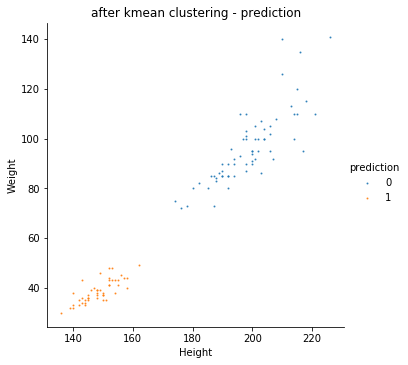

In [65]:
seaborn.lmplot('Height', 'Weight', data=two_sports[['Height', 'Weight', 'prediction']], fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 1}, # marker size
           hue="prediction") # color

# title
plt.title('after kmean clustering - prediction')

Text(0.5, 1.0, 'after kmean clustering - actual data')

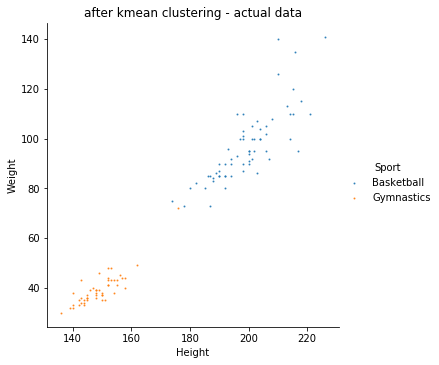

In [66]:
seaborn.lmplot('Height', 'Weight', data=two_sports[['Height', 'Weight', 'Sport']], fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 1}, # marker size
           hue="Sport") # color

# title
plt.title('after kmean clustering - actual data')